In [1]:
import numpy as np
from Ridge import Ridge_parameters
from prepare_data import prepare_data
from polynomial_features import polynomial_features
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

Quick check to see if ridge_parameter functions works as expected

In [2]:
pol = 5
X_train = polynomial_features(x_train,pol, False)
X_test = polynomial_features(x_test, pol, False)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

beta_Ridge = Ridge_parameters(X_train_s,y_train,1)
ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))  
ridge.fit(X_train, y_train)
ridge_step = ridge.named_steps["ridge"]

print(f"Our selfmade Ridge function has the parameters: {beta_Ridge}")
print(f"The imported Ridge function has the parameters: {ridge_step.coef_}")

Our selfmade Ridge function has the parameters: [-0.03040265 -0.55497492  0.0334894   0.36136476 -0.00513492]
The imported Ridge function has the parameters: [-0.03040265 -0.55497492  0.0334894   0.36136476 -0.00513492]


We can see that we get the same parameters

In [6]:
pol = 15
# lambdas = np.concatenate((np.logspace(1,-5,14),np.array([0])))
lambdas = [0,1e-5,1e-4,1e-3,1e-2,1e-1,1,10]

mse_r2_scores = np.zeros((15,8))

pol_degrees = np.arange(1,pol+1,dtype=int)


for pol in pol_degrees:    
    X_train = polynomial_features(x_train,pol, False)
    X_test = polynomial_features(x_test, pol, False)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y)

    for i,lam in enumerate(lambdas):
        beta_Ridge = Ridge_parameters(X_train_s,y_train,lambda_=lam)
        y_test_fit = X_test_s@beta_Ridge
        mse_r2_scores[pol-1,i] = mse(y_test,y_test_fit+y_offset)

df = pd.DataFrame(mse_r2_scores)
df.index = pol_degrees
df.columns = lambdas
df = df.rename_axis("Pol deg", axis=0).rename_axis("Lambda", axis=1)
df

Lambda,0.00000,0.00001,0.00010,0.00100,0.01000,0.10000,1.00000,10.00000
Pol deg,,,,,,,,
1,0.073961,0.073961,0.073961,0.073961,0.073961,0.073957,0.073919,0.073586
2,0.044121,0.044121,0.044121,0.044120,0.044115,0.044063,0.043561,0.039889
3,0.046265,0.046265,0.046264,0.046263,0.046253,0.046148,0.045205,0.040157
4,0.022012,0.022012,0.022011,0.021999,0.021882,0.020808,0.016504,0.032569
5,0.022425,0.022425,0.022423,0.022409,0.022269,0.021031,0.016482,0.032857
6,0.016000,0.015997,0.015971,0.015717,0.013556,0.008532,0.018819,0.026696
7,0.015683,0.015680,0.015656,0.015417,0.013372,0.008566,0.018794,0.026807
8,0.010057,0.009994,0.009456,0.005914,0.007315,0.012687,0.015677,0.025826
9,0.010613,0.010543,0.009941,0.006134,0.007272,0.012625,0.015671,0.025864


In [11]:
latex_code = df.to_latex(index=False)

with open("table.tex", "w") as f:
    f.write(latex_code)

We had from the OLS that the polynomial of degree 8 had the lowest MSE.

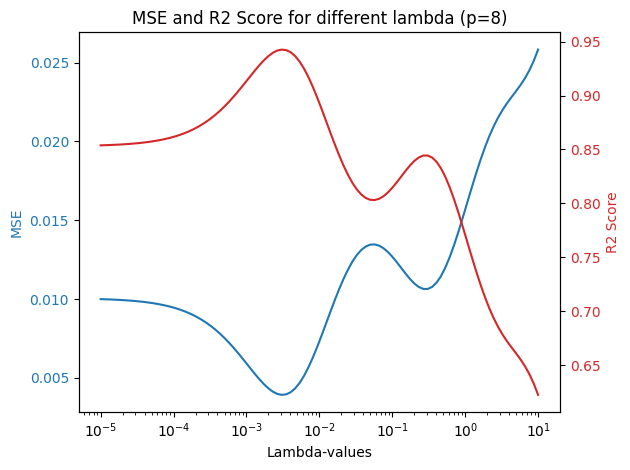

In [15]:
lambdas = np.logspace(1,-5,100)
n = len(lambdas)

mse_scores = np.zeros(n)
r2_scores = np.zeros(n)

for i,lam in enumerate(lambdas):
    X_train = polynomial_features(x_train,8, False)
    X_test = polynomial_features(x_test, 8, False)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y)

    beta_Ridge = Ridge_parameters(X_train_s,y_train,lam)
    y_test_fit = X_test_s@beta_Ridge+y_offset
    mse_scores[i] = mse(y_test,y_test_fit)
    r2_scores[i] = r2_score(y_test,y_test_fit)

fig, ax1 = plt.subplots()

# Plot MSE on the first y-axis (left)
ax1.plot(lambdas, mse_scores, color='tab:blue', label='MSE')
ax1.set_xscale('log')
ax1.set_xlabel('Lambda-values')
ax1.set_ylabel('MSE', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(lambdas, r2_scores, color='tab:red', label='R2 Score')
ax2.set_ylabel('R2 Score', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout
plt.title('MSE and R2 Score for different lambda (p=8)')
fig.tight_layout()
plt.show()

We had the lowest MSE in the table with a value of 0.002194 with a lambda of 10e-5 and polynomial degree of 10

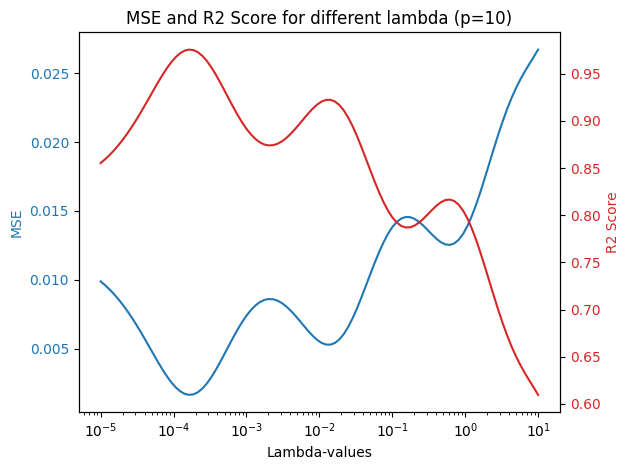

In [13]:
lambdas = np.logspace(1,-5,100)
n = len(lambdas)

mse_scores = np.zeros(n)
r2_scores = np.zeros(n)

for i,lam in enumerate(lambdas):
    X_train = polynomial_features(x_train,10, False)
    X_test = polynomial_features(x_test, 10, False)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y)

    beta_Ridge = Ridge_parameters(X_train_s,y_train,lam)
    y_test_fit = X_test_s@beta_Ridge+y_offset
    mse_scores[i] = mse(y_test,y_test_fit)
    r2_scores[i] = r2_score(y_test,y_test_fit)

fig, ax1 = plt.subplots()

# Plot MSE on the first y-axis (left)
ax1.plot(lambdas, mse_scores, color='tab:blue', label='MSE')
ax1.set_xscale('log')
ax1.set_xlabel('Lambda-values')
ax1.set_ylabel('MSE', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(lambdas, r2_scores, color='tab:red', label='R2 Score')
ax2.set_ylabel('R2 Score', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout
plt.title('MSE and R2 Score for different lambda (p=10)')
fig.tight_layout()
plt.show()

See how $\theta$ blows up as parameters increase

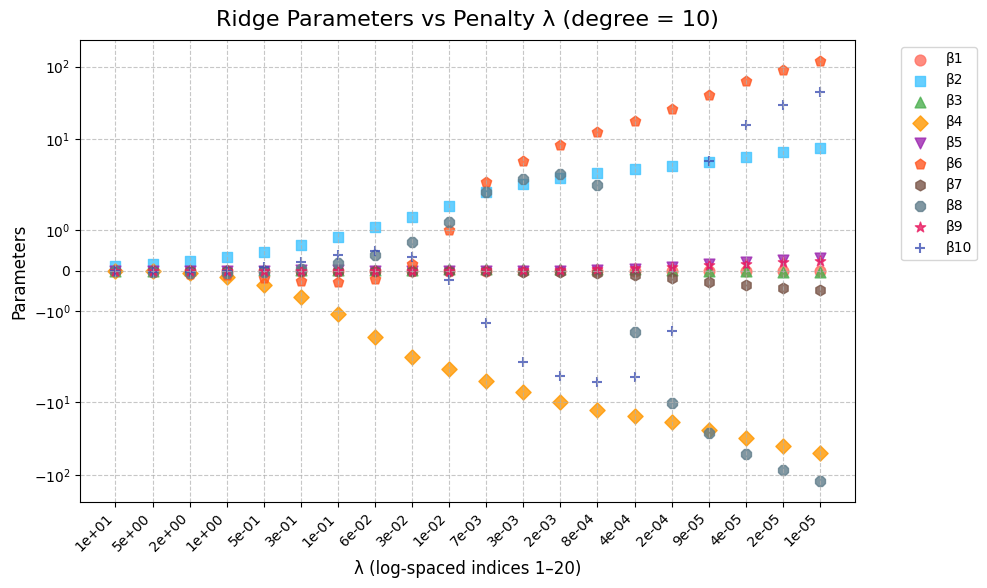

In [11]:

# ------------ data & design matrix ------------
degree = 10                               # keep polynomial degree fixed

# Match your earlier plotting of β1..βp (no intercept column)
X = polynomial_features(x, p=degree, intercept=False)

# ------------ sweep over λ and collect parameters ------------
# 20 lambda values to mirror the "1..20" density from your degree-plot
lambdas = np.logspace(1, -5, 20)
parameters = np.zeros((len(lambdas), degree))

for i, lam in enumerate(lambdas):
    beta = Ridge_parameters(X, y_noisy, lambda_=lam)   # penalizes all coefficients (no intercept in X)
    parameters[i, :] = beta

# ------------ plot (keep the exact same styling choices) ------------
plt.figure()
markers = ['o', 's', '^', 'D', 'v', 'p', 'h', '8', '*', '+', 'x', '|', '_', '1', '2', '3', '4', '<', '>', 'H', 'X', 'P', 'D', 'o', 's']
colors  = ['#FF6F61', '#40C4FF', '#4CAF50', '#FF9800', '#9C27B0', '#FF5722', '#795548', '#607D8B', '#E91E63', '#3F51B5', '#009688', '#FFC107', '#8BC34A', '#FF9800', '#F44336', '#2196F3', '#4CAF50', '#FF9800', '#9C27B0', '#FF5722', '#795548', '#607D8B', '#E91E63', '#3F51B5', '#009688']

# We'll put each lambda at an integer x-position (1..20) to preserve your scatter style;
# then label the ticks with the scientific notation of λ.
plot_indices = list(range(1, len(lambdas) + 1))

legend_added = set()

for idx, x_pos in enumerate(plot_indices):
    lam_params = parameters[idx, :degree]         # β1..β_degree at this λ
    degree_x   = np.full(degree, x_pos)           # all points for this λ share same x position
    degree_y   = lam_params

    for j in range(degree):
        label = f'β{j+1}' if j not in legend_added else ""
        if label:
            legend_added.add(j)

        plt.scatter(degree_x[j], degree_y[j],
                    marker=markers[j % len(markers)],
                    color=colors[j % len(colors)],
                    s=60, alpha=0.8, label=label)

# Titles, labels, scales, grid, legend placement, and sizing kept identical in style
plt.title(f"Ridge Parameters vs Penalty λ (degree = {degree})", fontsize=16, fontfamily='sans-serif', pad=10)
plt.xlabel("λ (log-spaced indices 1–20)", fontsize=12, fontfamily='sans-serif')
plt.ylabel("Parameters", fontsize=12, fontfamily='sans-serif')
plt.yscale('symlog')

# Set x-ticks to 1..20 and label them with λ in scientific notation
plt.xticks(plot_indices, [f"{lam:.0e}" for lam in lambdas], rotation=45, ha="right")

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.savefig("Plots/ridge_parameters_by_lambda_deg10.pdf", bbox_inches="tight")
plt.show()
